In [84]:
import yfinance as yf

equity = "BAJAJFINSV.NS"

yfinancedf = yf.download(equity, interval="1m", period="7d")
yfinancedf.columns = yfinancedf.columns.get_level_values(0)

df = yfinancedf.copy()
df['Time'] = df.index


[*********************100%***********************]  1 of 1 completed


In [85]:
df.head(10)

Price,Close,High,Low,Open,Volume,Time
Datetime,,,,,,
2025-04-23 03:45:00+00:00,2084.199951,2094.000000,2078.199951,2094.000000,0,2025-04-23 03:45:00+00:00
2025-04-23 03:46:00+00:00,2091.800049,2091.800049,2083.300049,2083.600098,16482,2025-04-23 03:46:00+00:00
2025-04-23 03:47:00+00:00,2094.300049,2096.100098,2088.000000,2091.800049,18535,2025-04-23 03:47:00+00:00
2025-04-23 03:48:00+00:00,2092.600098,2096.300049,2091.300049,2094.300049,8664,2025-04-23 03:48:00+00:00
2025-04-23 03:49:00+00:00,2088.199951,2093.199951,2088.199951,2092.600098,5057,2025-04-23 03:49:00+00:00
2025-04-23 03:50:00+00:00,2090.800049,2091.000000,2085.899902,2089.100098,12830,2025-04-23 03:50:00+00:00
2025-04-23 03:51:00+00:00,2093.600098,2094.399902,2090.600098,2090.899902,5967,2025-04-23 03:51:00+00:00
2025-04-23 03:52:00+00:00,2094.199951,2095.899902,2092.100098,2093.600098,6707,2025-04-23 03:52:00+00:00
2025-04-23 03:53:00+00:00,2088.399902,2094.199951,2087.000000,2093.000000,8036,2025-04-23 03:53:00+00:00


In [86]:
import pandas_ta as ta
import numpy as np

# Calculating the features

df['rsi'] = ta.rsi(close=df['Close'], length=14)
df['sma'] = ta.sma(close=df['Close'], length=20)

# Perccentage change of closing price from it's 20 period mean.
df['sma_deviation'] = (df['Close'] - df['sma']) / df['sma']
df['slope'] = (df['Close'] - df['Close'].shift(10)) / 10
df['logreturn'] = np.log(df['Close'] / df['Close'].shift(10))
df['logvolume'] = np.log(df['Volume'].replace(0, np.nan))
df['logvolume_mean'] = df['logvolume'].rolling(window=10).mean()
df['logvolume_std'] = df['logvolume'].rolling(window=10).std()

# Computing volume z score, how far log volume is from it's mean in terms of std deviation.
df['volume_zscore'] = (df['logvolume'] - df['logvolume_mean']) / df['logvolume_std']

# Close column would be used to calculate future returns for training & test data. Taking 10 units of return
df['future_return'] = (df['Close'].shift(-10) / df['Close']) - 1


df = df[['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore', 'future_return', 'Close']]

df = df.dropna()
df.head(10)

Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close
Datetime,,,,,,,
2025-04-23 04:04:00+00:00,27.994710,-0.005686,-1.330005,-0.006392,-0.192136,0.002411,2074.000000
2025-04-23 04:05:00+00:00,27.869197,-0.005488,-1.200000,-0.005770,0.844035,0.001784,2073.899902
2025-04-23 04:06:00+00:00,36.181433,-0.003830,-0.719995,-0.003461,-0.390836,0.000337,2076.600098
2025-04-23 04:07:00+00:00,34.440099,-0.003909,-0.989990,-0.004759,-1.258051,-0.000048,2075.500000
2025-04-23 04:08:00+00:00,36.533079,-0.003181,-0.819995,-0.003942,-0.716112,-0.000867,2076.199951
2025-04-23 04:09:00+00:00,43.226211,-0.001798,-0.379980,-0.001826,-1.335075,-0.002165,2078.600098
2025-04-23 04:10:00+00:00,44.020351,-0.001369,-0.180005,-0.000865,0.288034,-0.004281,2078.899902
2025-04-23 04:11:00+00:00,40.000657,-0.001929,-0.480005,-0.002308,1.021375,-0.003130,2076.899902
2025-04-23 04:12:00+00:00,36.583171,-0.002382,-0.300000,-0.001445,1.023576,-0.002651,2075.000000


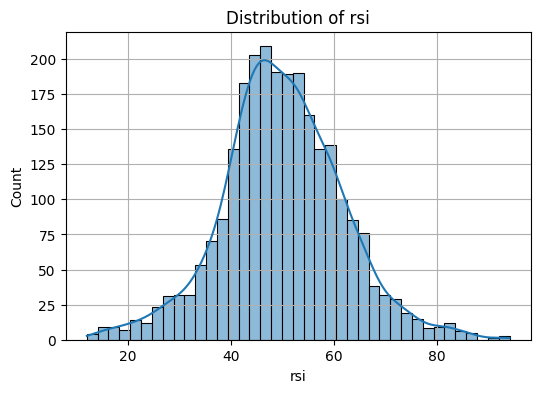

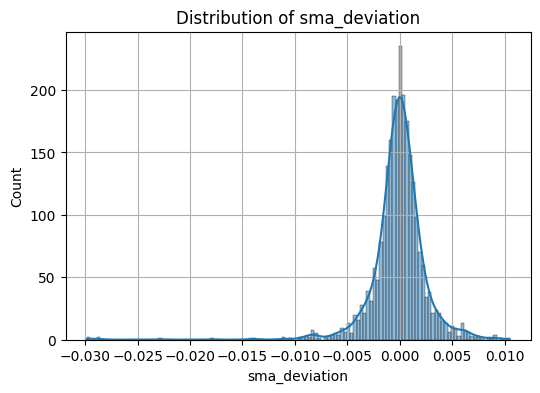

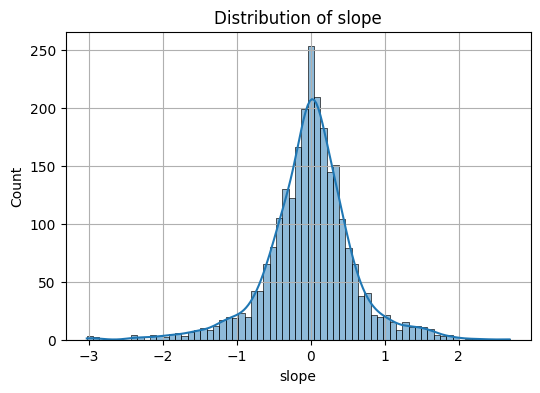

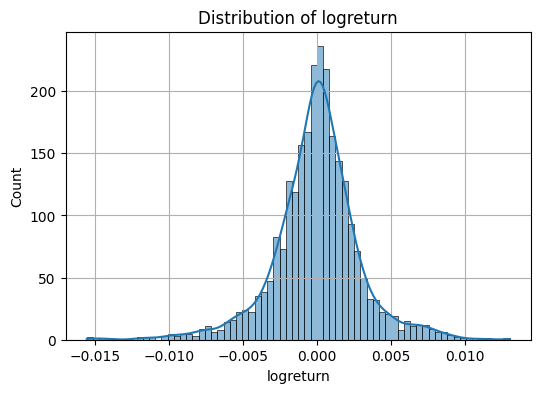

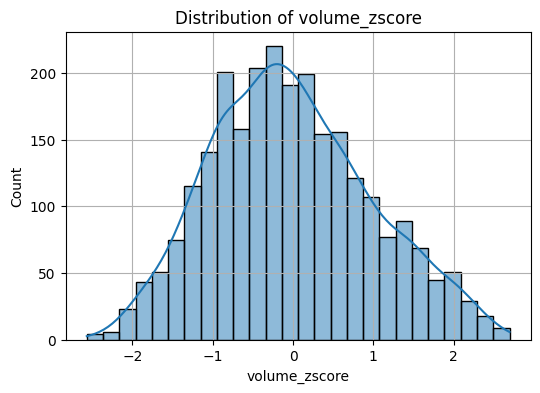

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['rsi', 'sma_deviation', 'slope', 'logreturn', 'volume_zscore']:
  plt.figure(figsize=(6, 4))
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribution of {col}')
  plt.grid(True)
  plt.show()


In [88]:
# Defining Market Regimes

bull_threshold = 0.002
bear_threshold = -0.002

"""
df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
    df['future_return'] < bear_threshold
  ],
  ['bull', 'bear'],
  default='side'
)
"""

df['regime'] = np.select(
  [
    df['future_return'] > bull_threshold,
  ],
  ['bull'],
  default='side'
)

df.head(10)


Price,rsi,sma_deviation,slope,logreturn,volume_zscore,future_return,Close,regime
Datetime,,,,,,,,
2025-04-23 04:04:00+00:00,27.994710,-0.005686,-1.330005,-0.006392,-0.192136,0.002411,2074.000000,bull
2025-04-23 04:05:00+00:00,27.869197,-0.005488,-1.200000,-0.005770,0.844035,0.001784,2073.899902,side
2025-04-23 04:06:00+00:00,36.181433,-0.003830,-0.719995,-0.003461,-0.390836,0.000337,2076.600098,side
2025-04-23 04:07:00+00:00,34.440099,-0.003909,-0.989990,-0.004759,-1.258051,-0.000048,2075.500000,side
2025-04-23 04:08:00+00:00,36.533079,-0.003181,-0.819995,-0.003942,-0.716112,-0.000867,2076.199951,side
2025-04-23 04:09:00+00:00,43.226211,-0.001798,-0.379980,-0.001826,-1.335075,-0.002165,2078.600098,side
2025-04-23 04:10:00+00:00,44.020351,-0.001369,-0.180005,-0.000865,0.288034,-0.004281,2078.899902,side
2025-04-23 04:11:00+00:00,40.000657,-0.001929,-0.480005,-0.002308,1.021375,-0.003130,2076.899902,side
2025-04-23 04:12:00+00:00,36.583171,-0.002382,-0.300000,-0.001445,1.023576,-0.002651,2075.000000,side


In [89]:
# Checking class distribution

df['regime'].value_counts(normalize=True)


regime
side    0.818075
bull    0.181925
Name: proportion, dtype: float64

In [90]:
%pip install pandas_ta scikit-learn matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\sparsh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

features = ['rsi', 'slope', 'logreturn', 'volume_zscore']

split_idx = int(len(df) * 0.8)
X_train = df.iloc[:split_idx][features]
y_train = df.iloc[:split_idx]['regime']
X_test = df.iloc[split_idx:][features]
y_test = df.iloc[split_idx:]['regime']

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

        bull       0.50      0.12      0.20       106
        side       0.81      0.97      0.88       406

    accuracy                           0.79       512
   macro avg       0.65      0.55      0.54       512
weighted avg       0.74      0.79      0.74       512



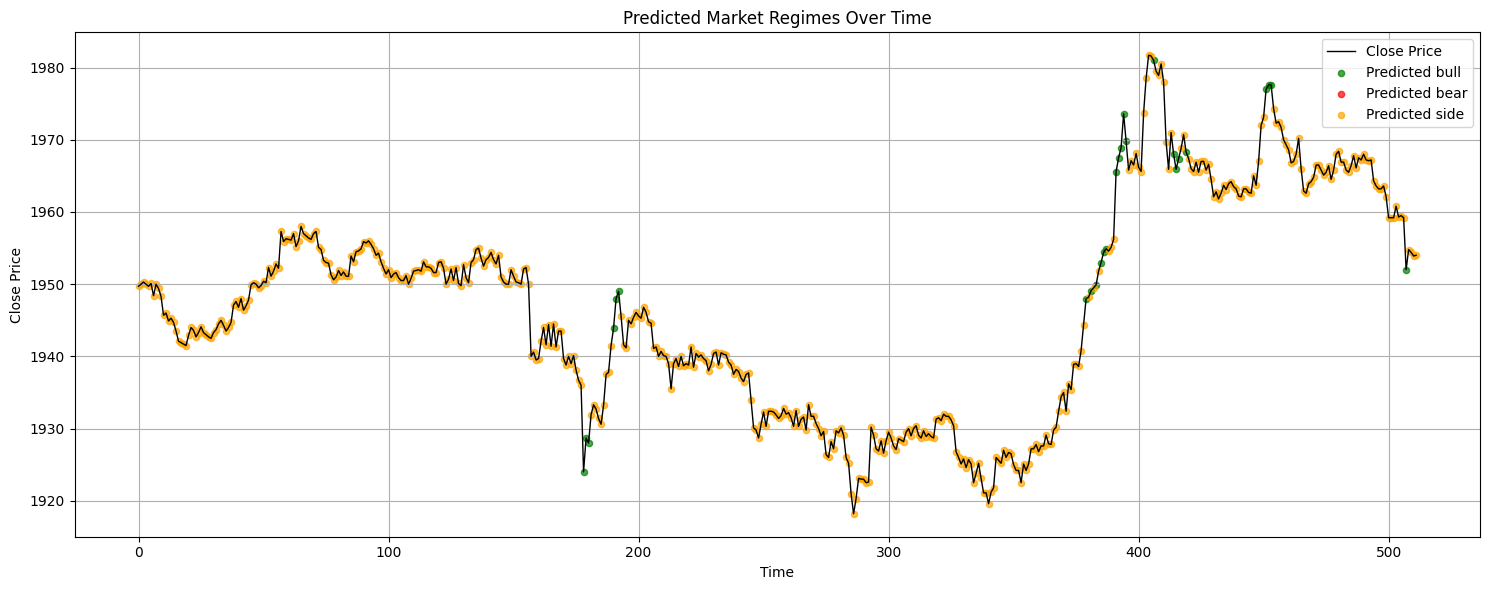

In [92]:


# Visualization

df_test = df.iloc[split_idx:].copy()
df_test['predicted_regime'] = y_pred

df_test = df_test.reset_index(drop=True)

plt.figure(figsize=(15, 6))
plt.plot(df_test.index, df_test['Close'], label='Close Price', color='black', linewidth=1)

colors = {'bull': 'green', 'bear': 'red', 'side': 'orange'}
for regime in ['bull', 'bear', 'side']:
  idx = df_test[df_test['predicted_regime'] == regime].index
  plt.scatter(idx, df_test.loc[idx, 'Close'], color=colors[regime], label=f'Predicted {regime}', s=20, alpha=0.7)

plt.title('Predicted Market Regimes Over Time')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Compute confusion matrix
# labels = ['bull', 'bear', 'side']
labels = ['bull', 'side']
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Display as a labeled DataFrame
confusion_df = pd.DataFrame(cm, index=[f"Actual_{l}" for l in labels], columns=[f"Pred_{l}" for l in labels])

# Print confusion matrix
print(confusion_df)

# Compute precision, recall, F1-score
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, digits=3))

             Pred_bull  Pred_side
Actual_bull         13         93
Actual_side         13        393

Classification Report:
              precision    recall  f1-score   support

        bull      0.500     0.123     0.197       106
        side      0.809     0.968     0.881       406

    accuracy                          0.793       512
   macro avg      0.654     0.545     0.539       512
weighted avg      0.745     0.793     0.740       512



C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sparsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py

<Figure size 800x500 with 0 Axes>

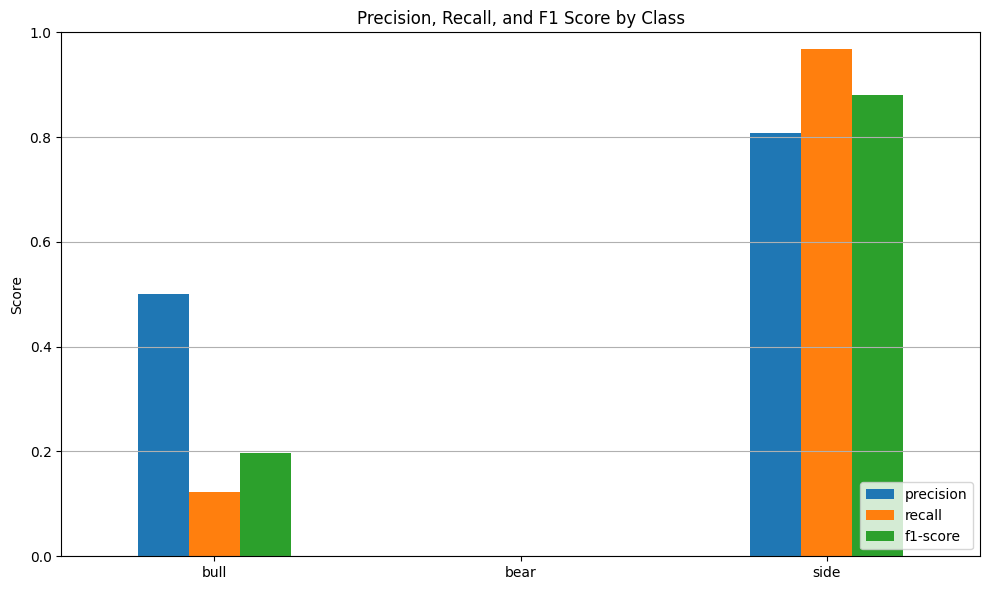

In [94]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Get classification report as dict
report = classification_report(y_test, y_pred, labels=['bull', 'bear', 'side'], output_dict=True)

# Convert to DataFrame for easy plotting
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['bull', 'bear', 'side'], ['precision', 'recall', 'f1-score']]

# Plotting
plt.figure(figsize=(8, 5))
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, and F1 Score by Class")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
